In [ ]:
# pip install --upgrade paddlepaddle

In [41]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 CPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


In [50]:
from main import MyPaddleOCR

In [51]:
ocr = MyPaddleOCR()

[2023/11/13 23:33:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/prlab/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/prlab/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l

In [52]:
ocr.get_available_langs()

Available Language : ['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari', 'french', 'german', 'structure']


In [53]:
ocr.get_available_models()

#1 Model Vesion : [PP-OCRv4] - Language : ['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']
#2 Model Vesion : [PP-OCRv3] - Language : ['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']
#3 Model Vesion : [PP-OCRv2] - Language : ['ch']
#4 Model Vesion : [PP-OCR] - Language : ['ch', 'en', 'french', 'german', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari', 'structure']


In [56]:
img_path = '/home/prlab/Desktop/pythonProject/korean_ocr_using_paddleOCR/data/images/26.jpg'

[2023/11/15 20:16:22] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.13901901245117188
[2023/11/15 20:16:25] ppocr DEBUG: rec_res num  : 9, elapsed : 2.370317220687866


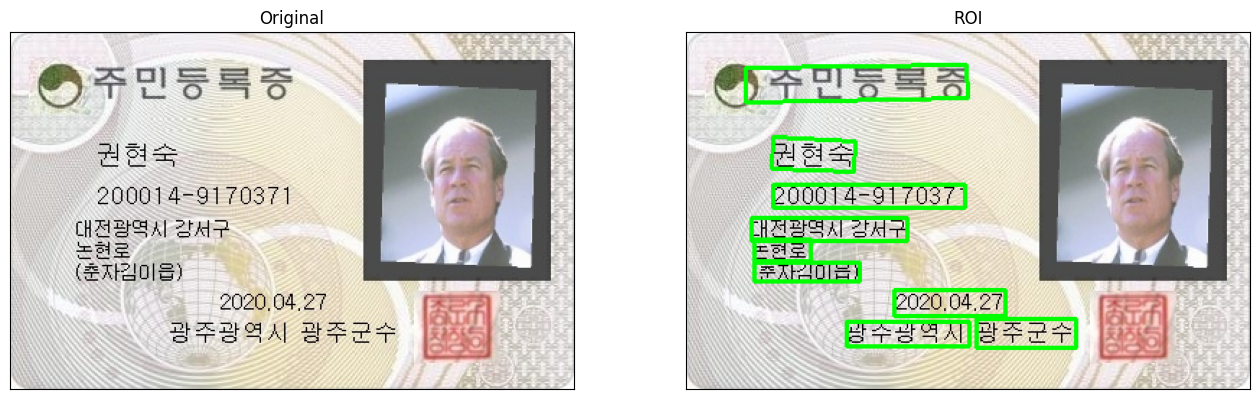

['주민등록증',
 '권현숙',
 '200014-917037',
 '대전괄시감서구',
 '논현로',
 '춘자김미급]',
 '20200427',
 '광주광역시',
 '광주군수']

In [57]:
ocr.run_ocr(img_path, debug=True)

In [20]:
ocr.get_ocr_result()

[[[[43.0, 23.0], [194.0, 23.0], [194.0, 49.0], [43.0, 49.0]],
  ('주민등증', 0.9499474167823792)],
 [[[59.0, 76.0], [118.0, 76.0], [118.0, 96.0], [59.0, 96.0]],
  ('최정자', 0.9996077418327332)],
 [[[60.0, 106.0], [194.0, 106.0], [194.0, 122.0], [60.0, 122.0]],
  ('310817-7851031', 0.959125816822052)],
 [[[47.0, 130.0], [154.0, 130.0], [154.0, 143.0], [47.0, 143.0]],
  ('서물특별시섬북구', 0.9442634582519531)],
 [[[46.0, 143.0], [164.0, 143.0], [164.0, 160.0], [46.0, 160.0]],
  ('멱삼가[지현박김리}', 0.8982561230659485)],
 [[[139.0, 179.0], [221.0, 178.0], [221.0, 196.0], [140.0, 197.0]],
  ('202102 26', 0.9581602811813354)],
 [[[112.0, 200.0], [197.0, 200.0], [197.0, 217.0], [112.0, 217.0]],
  ('광주광역시', 0.9045646786689758)],
 [[[201.0, 199.0], [269.0, 199.0], [269.0, 219.0], [201.0, 219.0]],
  ('광주군수', 0.9974751472473145)]]

In [12]:
# !pip install pillow

In [17]:
from PIL import Image, ImageDraw

def redact_regions(image_path, regions_to_redact):
    # Open the image
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)

    # Redact each specified region
    for region in regions_to_redact:
        # Extract region coordinates
        region_coordinates = region[0]
        x, y, w, h = [int(coord) for coord in [region_coordinates[0][0], region_coordinates[0][1], region_coordinates[2][0] - region_coordinates[0][0], region_coordinates[2][1] - region_coordinates[0][1]]]

        # Redact the region by drawing a red rectangle
        draw.rectangle([x, y, x + w, y + h], fill="red")

    # Save the redacted image
    img.save("redacted_image.jpg")

# Specify the image path and regions to redact
img_path = '/home/prlab/Desktop/pythonProject/korean_ocr_using_paddleOCR/assets/images/11.jpg'
regions_to_redact = [
    [[[59.0, 76.0], [118.0, 76.0], [118.0, 96.0], [59.0, 96.0]], ('최정자', 0.9996077418327332)],
    [[[60.0, 106.0], [194.0, 106.0], [194.0, 122.0], [60.0, 122.0]], ('310817-7851031', 0.959125816822052)],
    [[[47.0, 130.0], [154.0, 130.0], [154.0, 143.0], [47.0, 143.0]], ('서물특별시섬북구', 0.9442634582519531)],
    [[[46.0, 143.0], [164.0, 143.0], [164.0, 160.0], [46.0, 160.0]], ('멱삼가[지현박김리}', 0.8982561230659485)]
]

# Perform redaction
redact_regions(img_path, regions_to_redact)
